<a href="https://colab.research.google.com/github/Tudped/colab-test/blob/main/classicfication_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import Data
### Create header, read csv file to data frame, and display first 5 rows of data

In [ ]:
cols = ["flength", "fwidth", "fsize", "fconc","fconc1","fasym","fm3long","fm3trans","falpha","fdist","class"]
# df = pd.read_csv("/content/drive/MyDrive/data/magic04.data", names=cols)
df = pd.read_csv("magic04.data", names=cols)
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df.tail()

flength   fwidth   fsize   fconc  fconc1     fasym   fm3long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fm3trans   falpha     fdist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

### Generate descriptive statistics

In [ ]:
df.describe()

flength        fwidth         fsize         fconc        fconc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fasym       fm3long      fm3trans        falpha         fdist  
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000  
mean      -4.331745     10.545545      0.249726     27.645707    193.818026  
std       59.206062     51.000118     20.827439     26.103621     74.731787  
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600  
25%      -20.586550    -12.842775    -10.849375      5.547925    142.492250  
50%        4.013050     15.314100      0.666200     17.679500    191.851450  
75%       24.063700     35.837800     10.946425     45.883550    240.563825  
max      575.240700    238.321000    179.851000     90.000000    495.561000

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

flength    fwidth   fsize   fconc  fconc1     fasym  fm3long  fm3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    falpha     fdist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

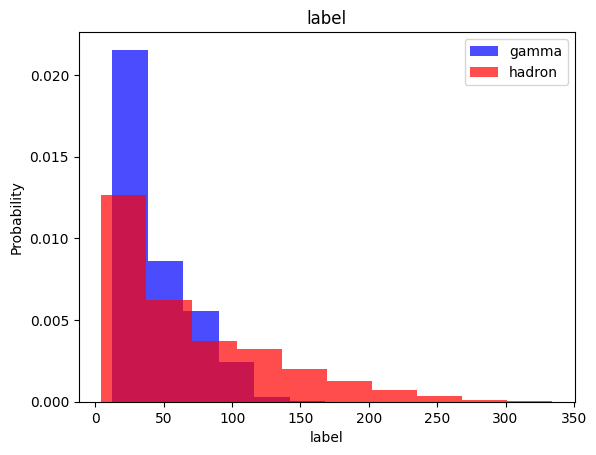

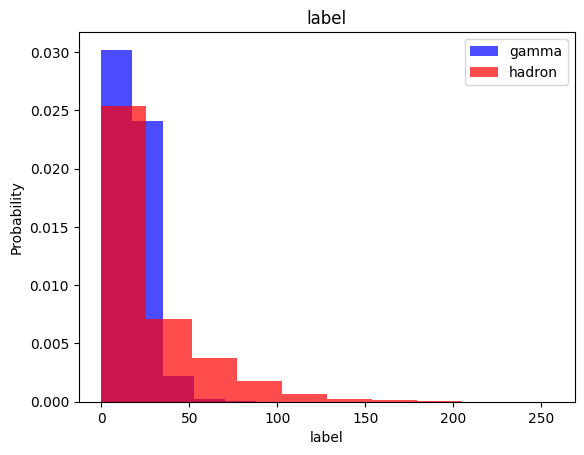

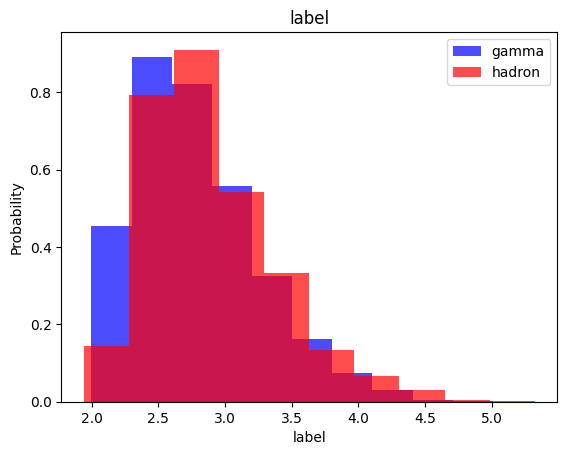

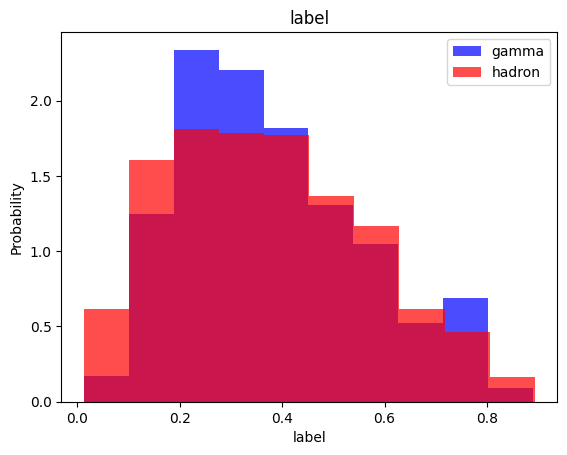

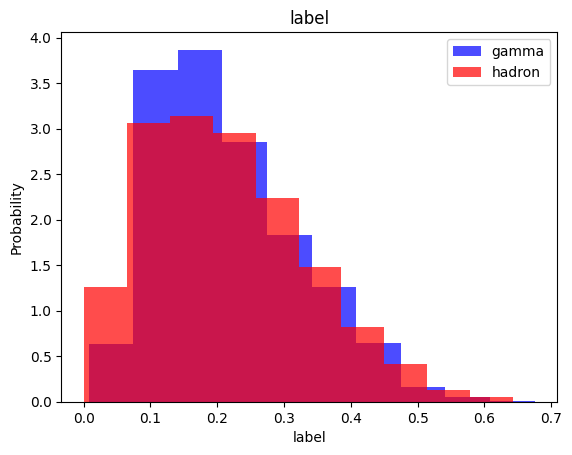

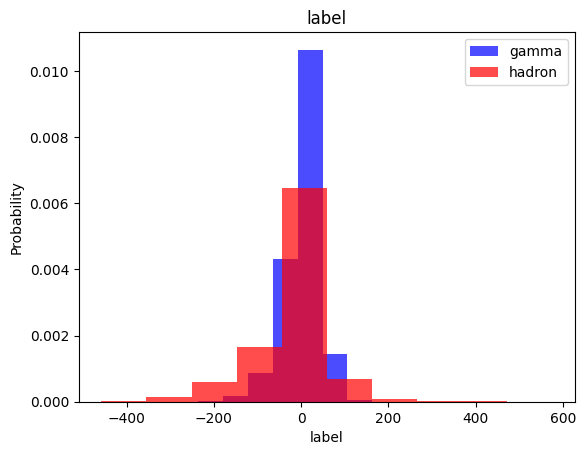

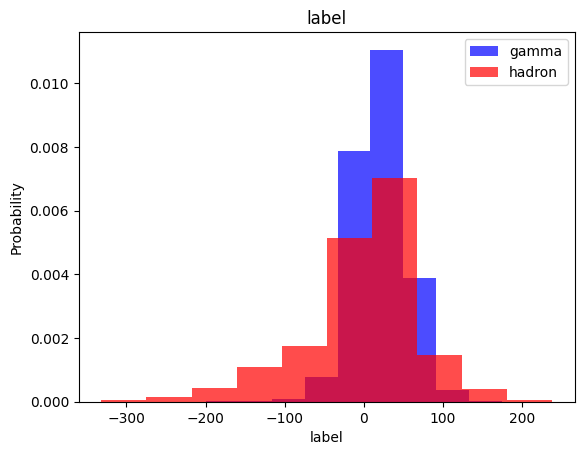

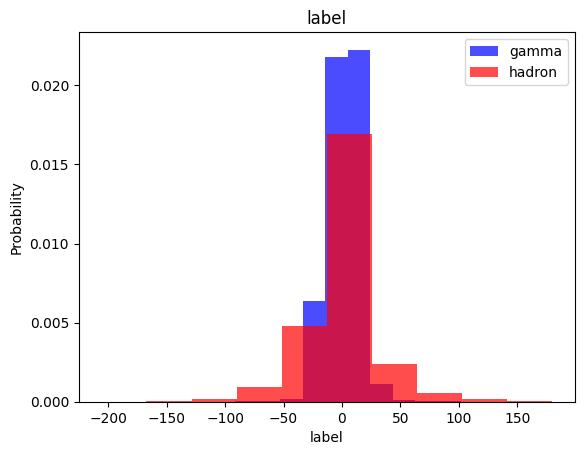

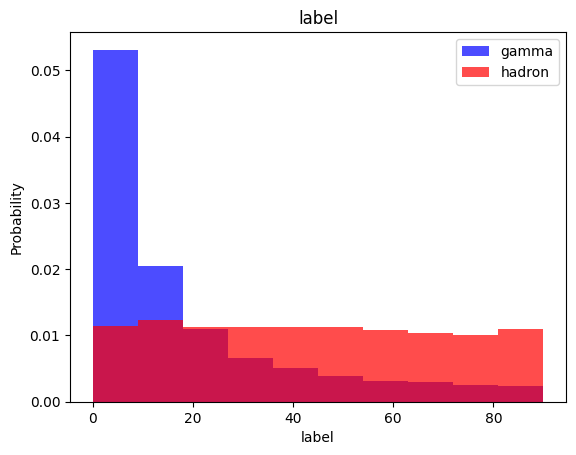

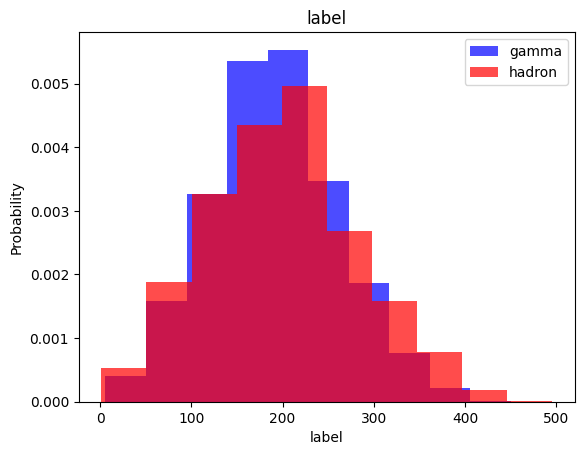

In [ ]:
for label in cols[:-1]:
  ## plt.hist(df[df["class"]==1][label])
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title('label')
  plt.ylabel("Probability")
  plt.xlabel('label')
  plt.legend()
  plt.show()

In [ ]:
df.shape

(19020, 11)

## Create Train, validation, and test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

## sample = shuffling data

In [ ]:
print('Train data: ', train.shape)
print('Gamma: ', len(train[train["class"]==1])) #gamma
print('Hadron: ', len(train[train["class"]==0])) #hadron

Train data:  (11412, 11)
Gamma:  7414
Hadron:  3998


In [ ]:
print('Valid data: ', valid.shape)
print('Gamma: ', len(valid[valid["class"]==1])) #gamma
print('Hadron: ', len(valid[valid["class"]==0])) #hadron

Valid data:  (3804, 11)
Gamma:  2444
Hadron:  1360


In [ ]:
print('Test data: ', test.shape)
print('Gamma: ', len(test[test["class"]==1])) #gamma
print('Handron: ', len(test[test["class"]==0])) #hadron

Test data:  (3804, 11)
Gamma:  2474
Handron:  1330


In [ ]:
##dfs = [train, test, valid]
##for i in dfs:
##  print(f'i')
##  print('Shape: ', i.shape)
##  print('Gamma: ', len(i[i["class"]==1])) #gamma
##  print('Handron: ', len(i[i["class"]==0])) #hadron


## Over sample function

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X,np.reshape(y,(-1,1))))


  return data, X, y

In [ ]:
train_scale, X_train, y_train = scale_dataset(train, oversample=True)
valid_scale, X_valid, y_valid = scale_dataset(valid, oversample=False)
test_scale, X_test, y_test = scale_dataset(test, oversample=False)


#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)

[1 1 1 ... 1 0 0]
[1 1 1 ... 1 0 0]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1330
           1       0.86      0.86      0.86      2474

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_nb_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_nb_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1330
           1       0.73      0.89      0.80      2474

    accuracy                           0.72      3804
   macro avg       0.70      0.64      0.65      3804
weighted avg       0.71      0.72      0.69      3804



#Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_lg_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_lg_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1330
           1       0.84      0.82      0.83      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# Neural network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history= nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32


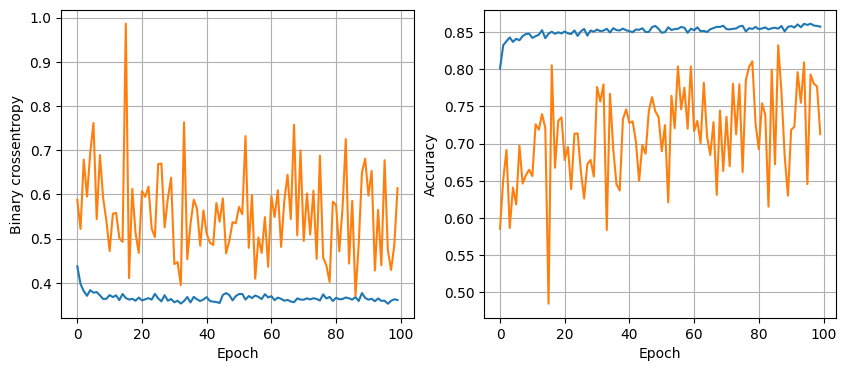

119/119 [==============================] - 0s 1ms/step - loss: 0.3248 - accuracy: 0.8801
16 nodes, dropout 0, lr 0.1, batch size 64


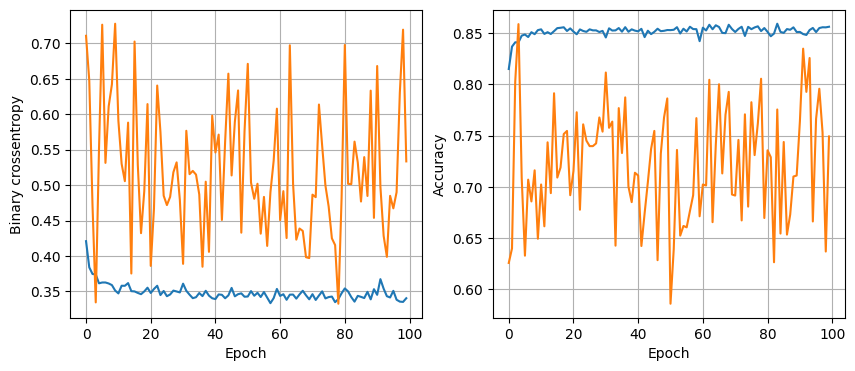

119/119 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8596
16 nodes, dropout 0, lr 0.1, batch size 128


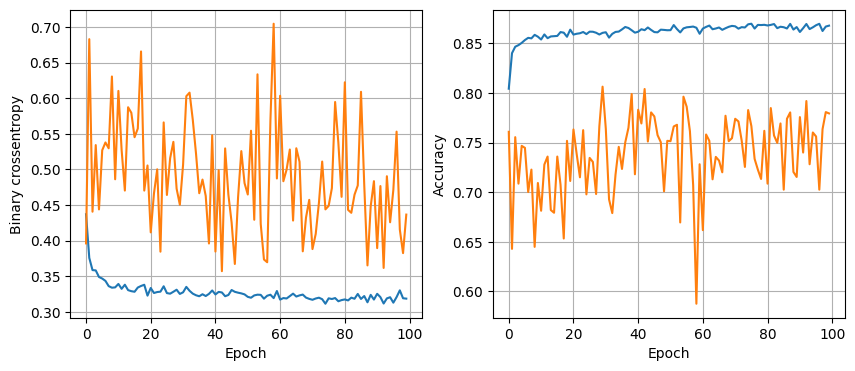

119/119 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.005, batch size 32


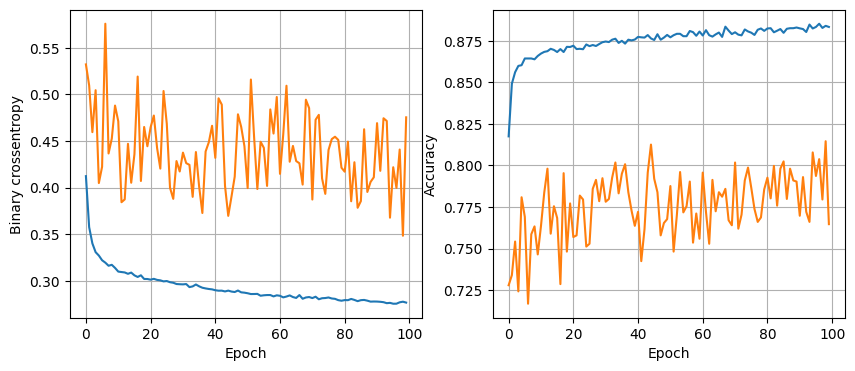

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.005, batch size 64


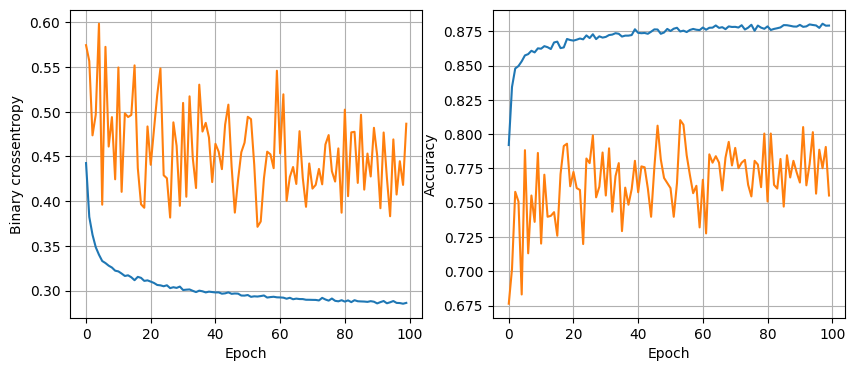

119/119 [==============================] - 0s 2ms/step - loss: 0.3048 - accuracy: 0.8785
16 nodes, dropout 0, lr 0.005, batch size 128


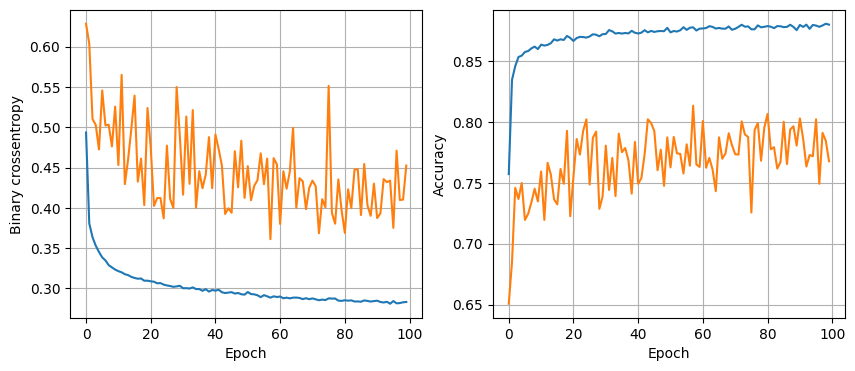

119/119 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8722
16 nodes, dropout 0, lr 0.001, batch size 32


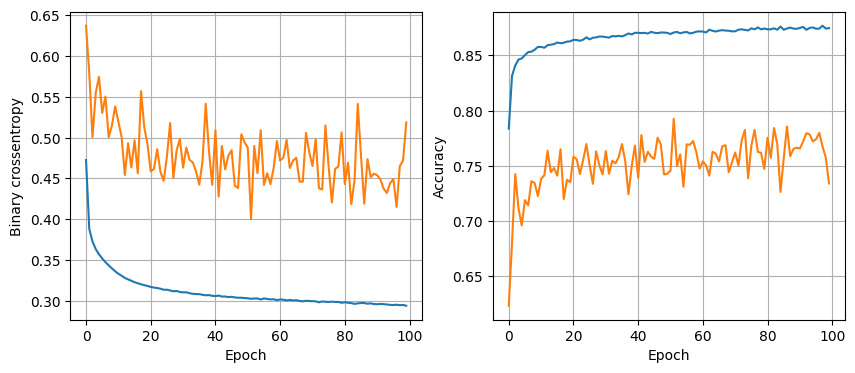

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8809
16 nodes, dropout 0, lr 0.001, batch size 64


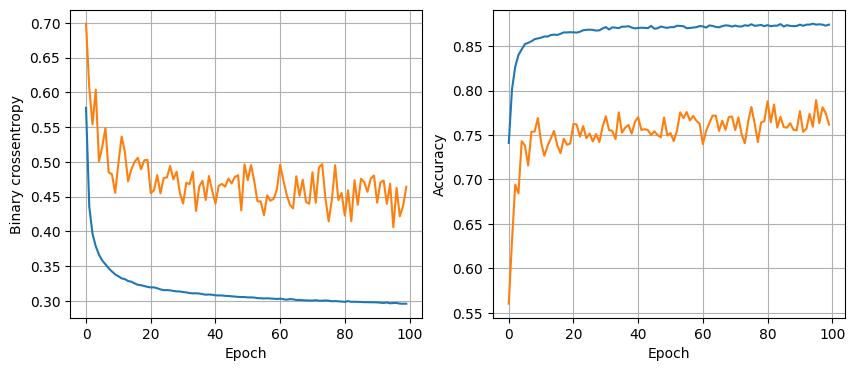

119/119 [==============================] - 0s 2ms/step - loss: 0.3005 - accuracy: 0.8791
16 nodes, dropout 0, lr 0.001, batch size 128


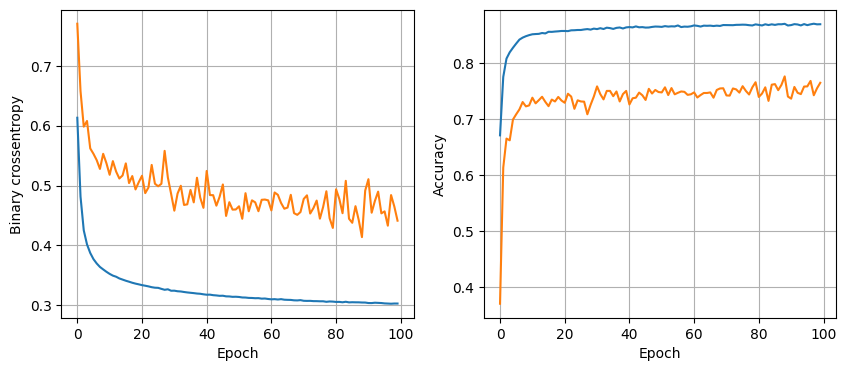

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.1, batch size 32


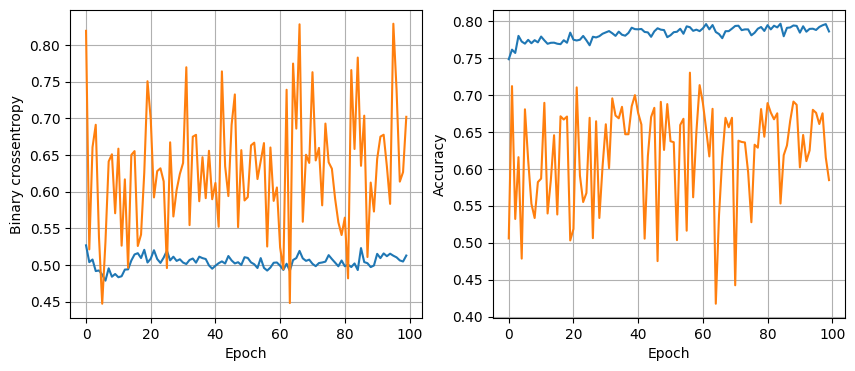

119/119 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8328
16 nodes, dropout 0.2, lr 0.1, batch size 64


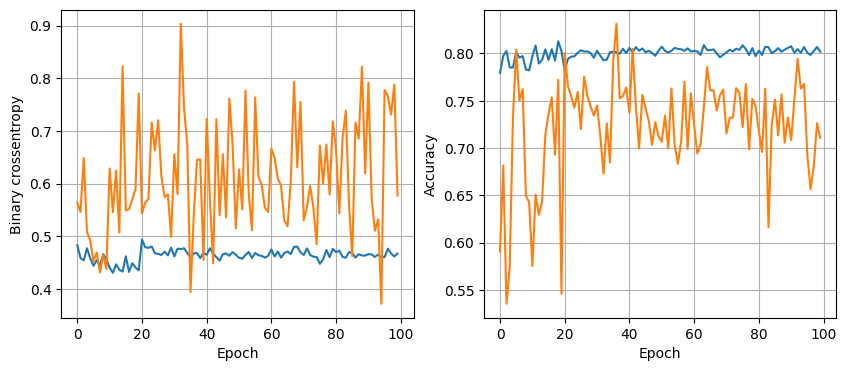

119/119 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8417
16 nodes, dropout 0.2, lr 0.1, batch size 128


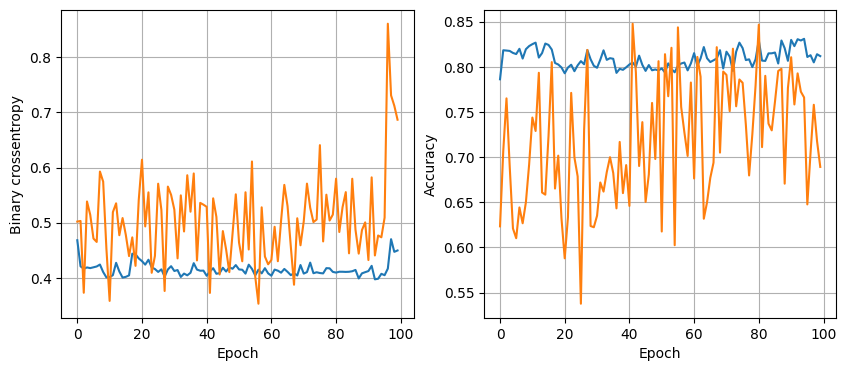

119/119 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8378
16 nodes, dropout 0.2, lr 0.005, batch size 32


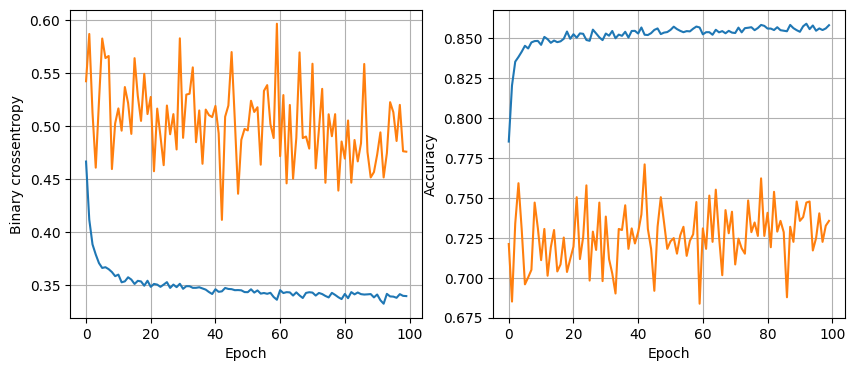

119/119 [==============================] - 0s 2ms/step - loss: 0.3085 - accuracy: 0.8770
16 nodes, dropout 0.2, lr 0.005, batch size 64


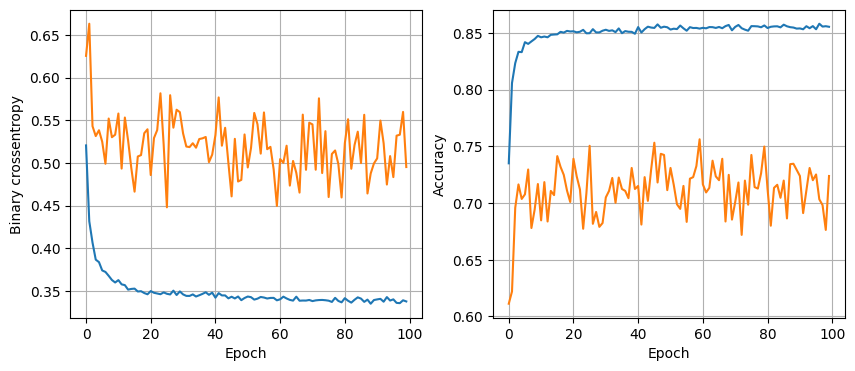

119/119 [==============================] - 0s 2ms/step - loss: 0.3016 - accuracy: 0.8770
16 nodes, dropout 0.2, lr 0.005, batch size 128


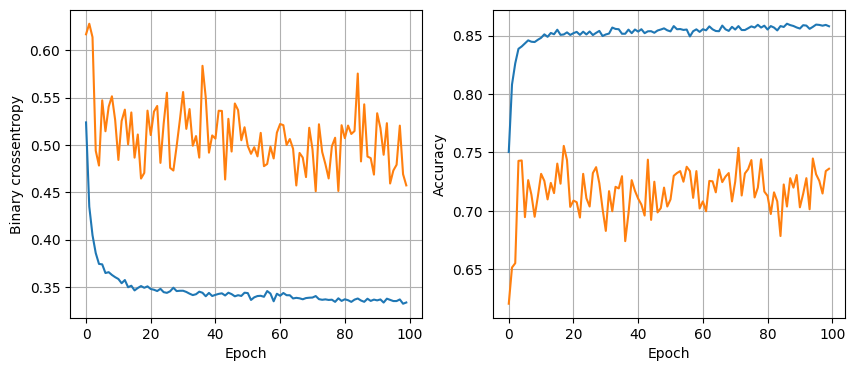

119/119 [==============================] - 0s 2ms/step - loss: 0.3029 - accuracy: 0.8770
16 nodes, dropout 0.2, lr 0.001, batch size 32


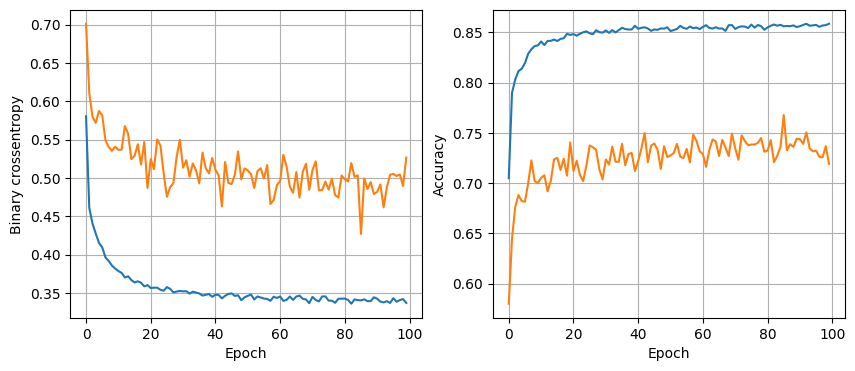

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8778
16 nodes, dropout 0.2, lr 0.001, batch size 64


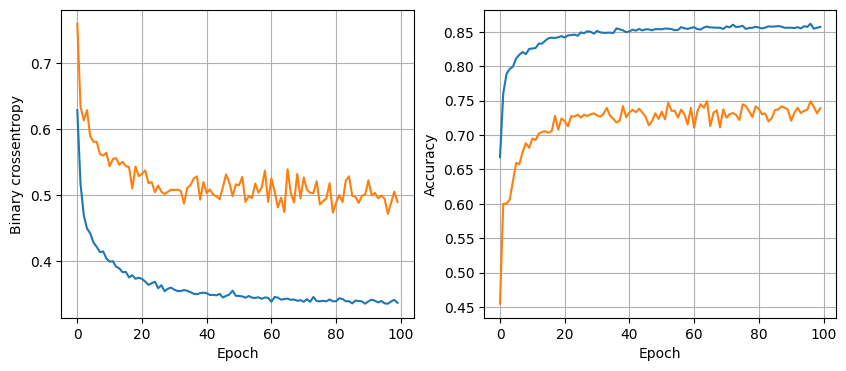

119/119 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8754
16 nodes, dropout 0.2, lr 0.001, batch size 128


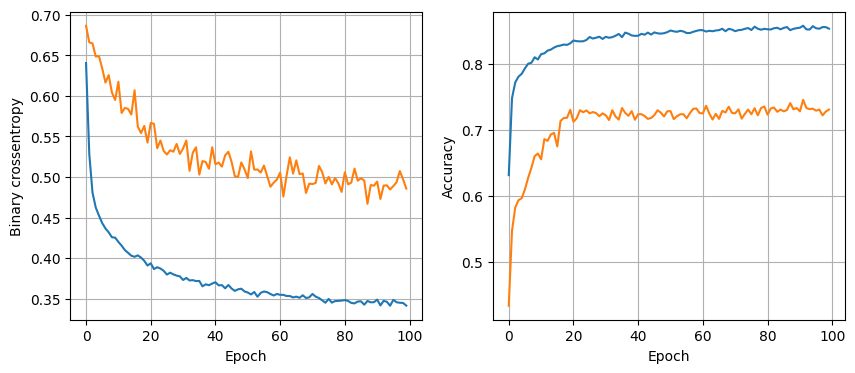

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8801
32 nodes, dropout 0, lr 0.1, batch size 32


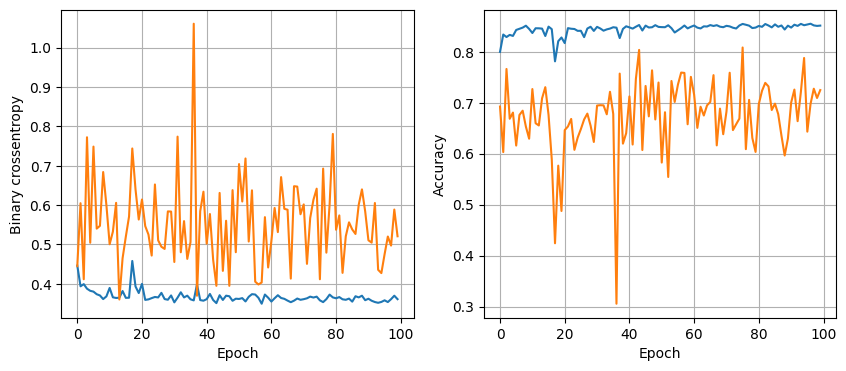

119/119 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8680
32 nodes, dropout 0, lr 0.1, batch size 64


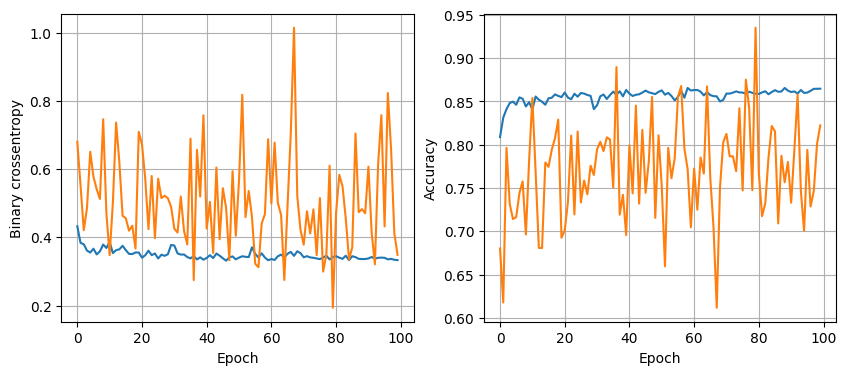

119/119 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8570
32 nodes, dropout 0, lr 0.1, batch size 128


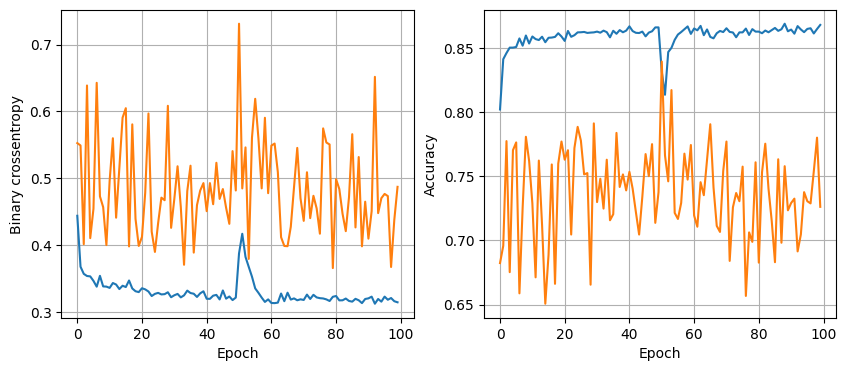

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch size 32


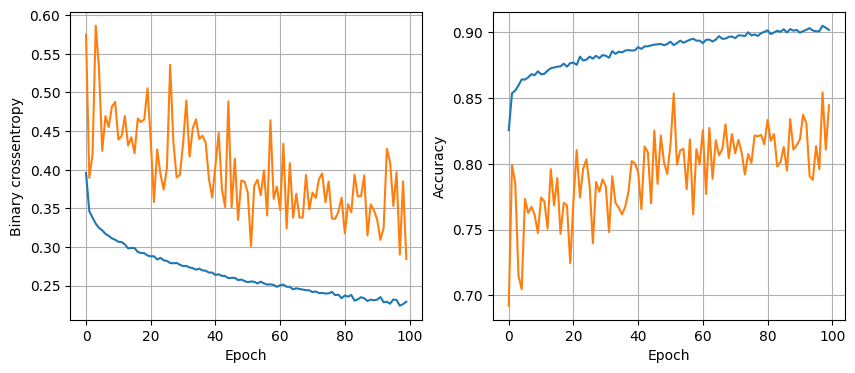

119/119 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.8601
32 nodes, dropout 0, lr 0.005, batch size 64


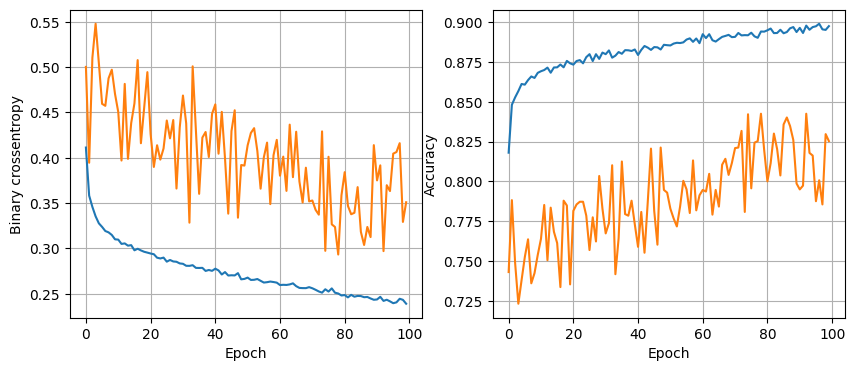

119/119 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8644
32 nodes, dropout 0, lr 0.005, batch size 128


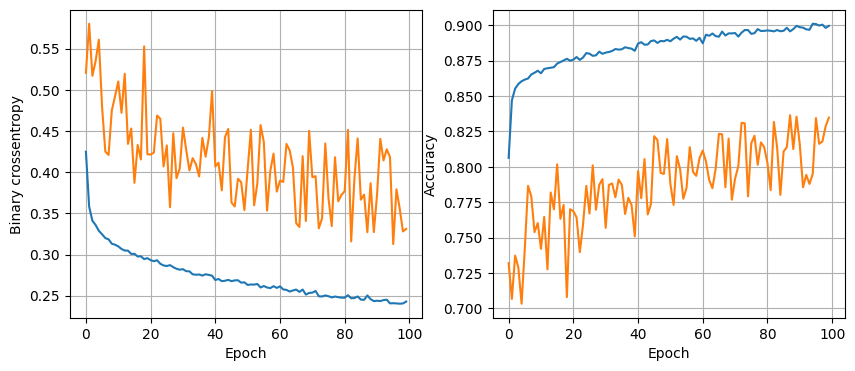

119/119 [==============================] - 0s 2ms/step - loss: 0.3355 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.001, batch size 32


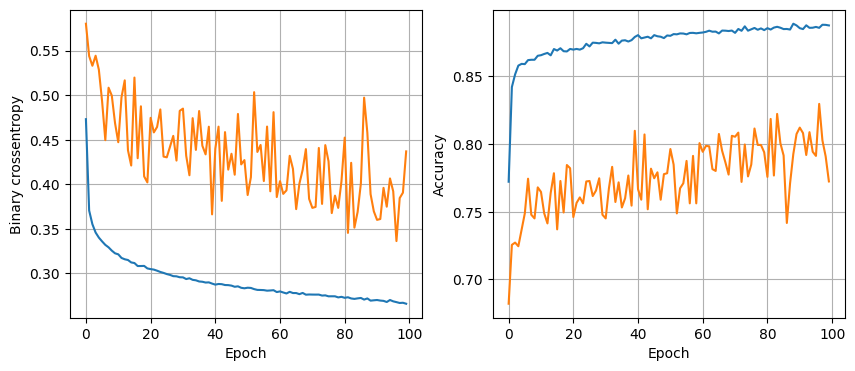

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8762
32 nodes, dropout 0, lr 0.001, batch size 64


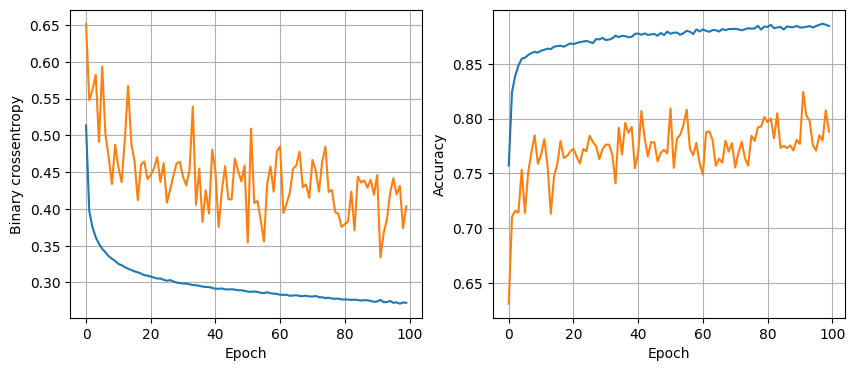

119/119 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8788
32 nodes, dropout 0, lr 0.001, batch size 128


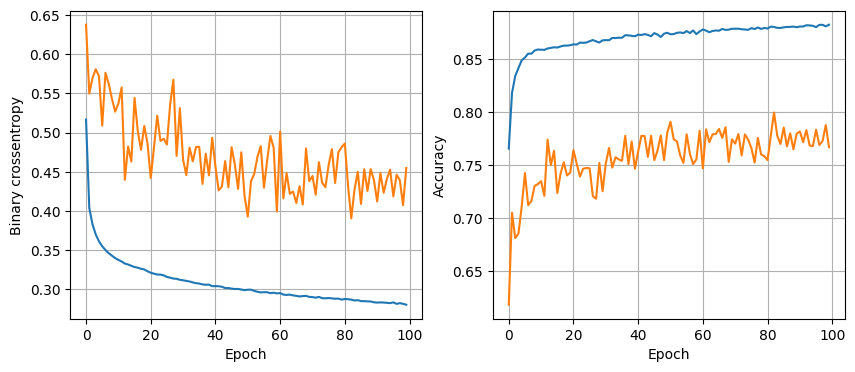

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8780
32 nodes, dropout 0.2, lr 0.1, batch size 32


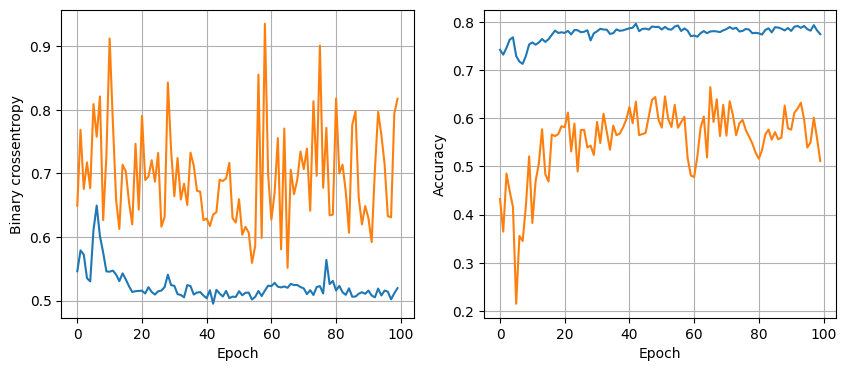

119/119 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8126
32 nodes, dropout 0.2, lr 0.1, batch size 64


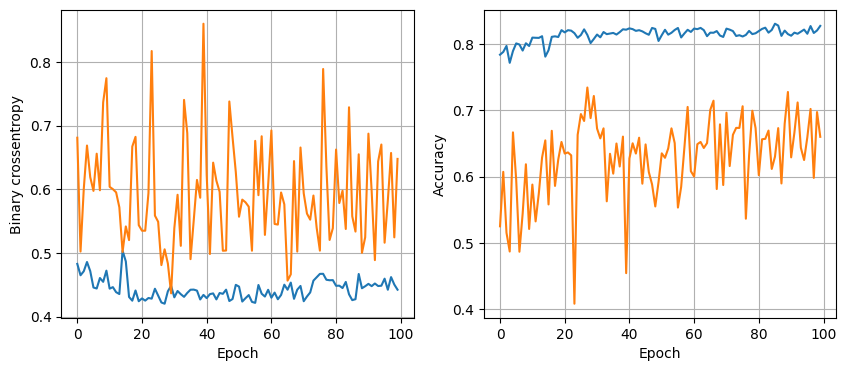

119/119 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8623
32 nodes, dropout 0.2, lr 0.1, batch size 128


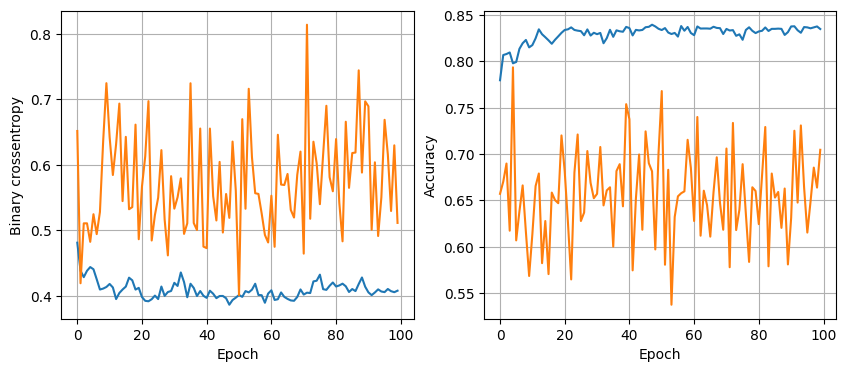

119/119 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.005, batch size 32


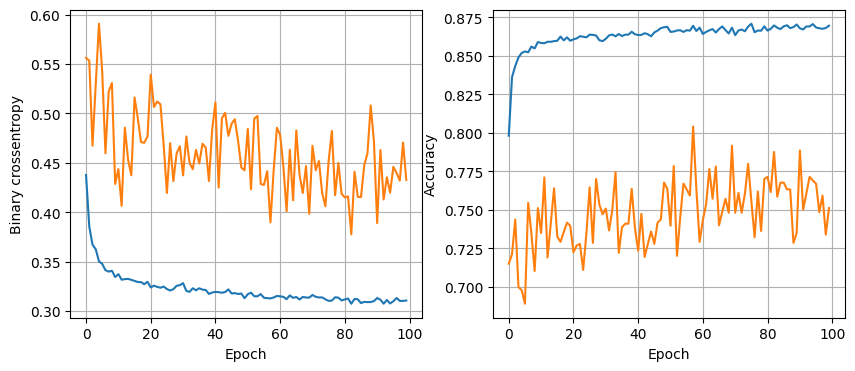

119/119 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8799
32 nodes, dropout 0.2, lr 0.005, batch size 64


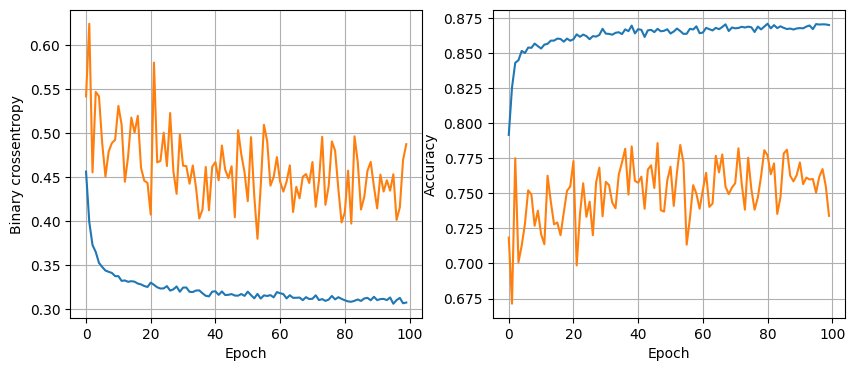

119/119 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8801
32 nodes, dropout 0.2, lr 0.005, batch size 128


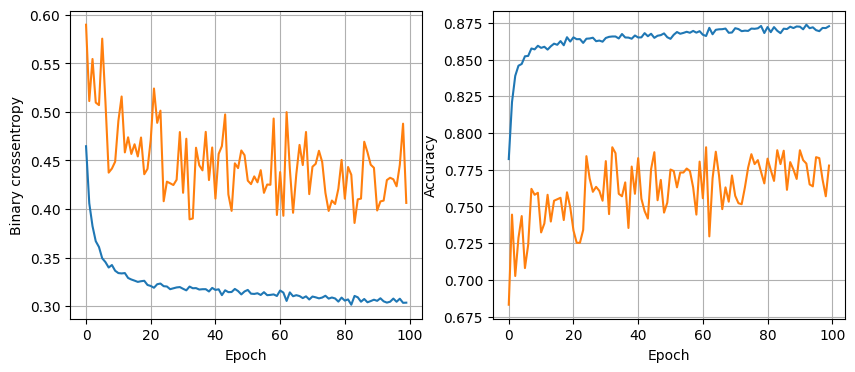

119/119 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.001, batch size 32


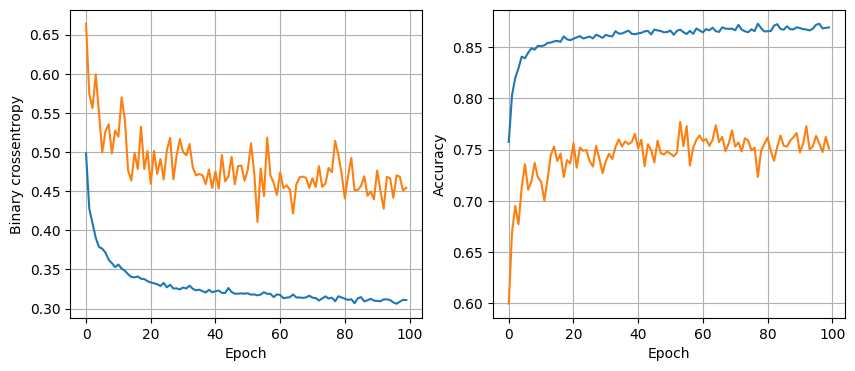

119/119 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.001, batch size 64


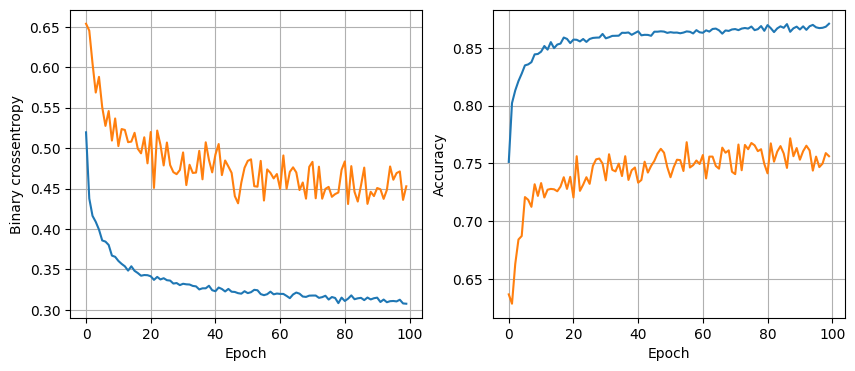

119/119 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8796
32 nodes, dropout 0.2, lr 0.001, batch size 128


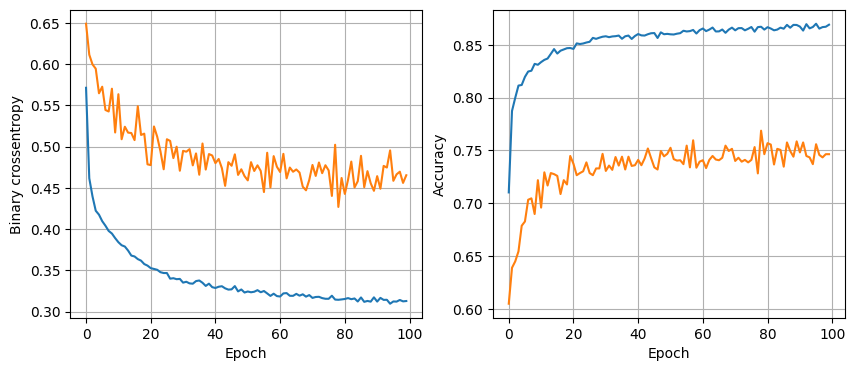

119/119 [==============================] - 0s 2ms/step - loss: 0.2953 - accuracy: 0.8859
64 nodes, dropout 0, lr 0.1, batch size 32


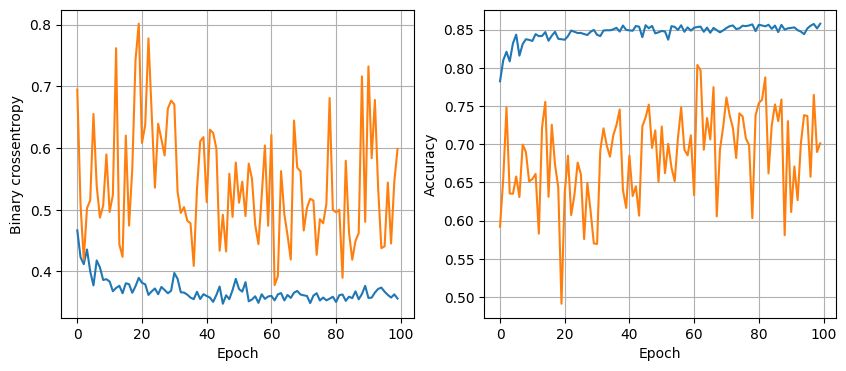

119/119 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8651
64 nodes, dropout 0, lr 0.1, batch size 64


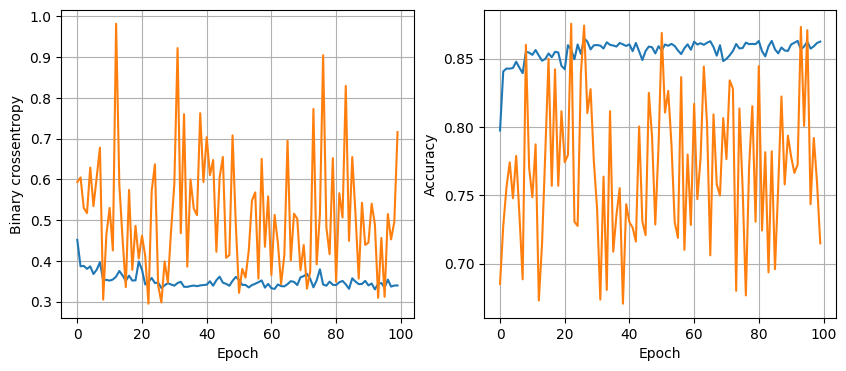

119/119 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8717
64 nodes, dropout 0, lr 0.1, batch size 128


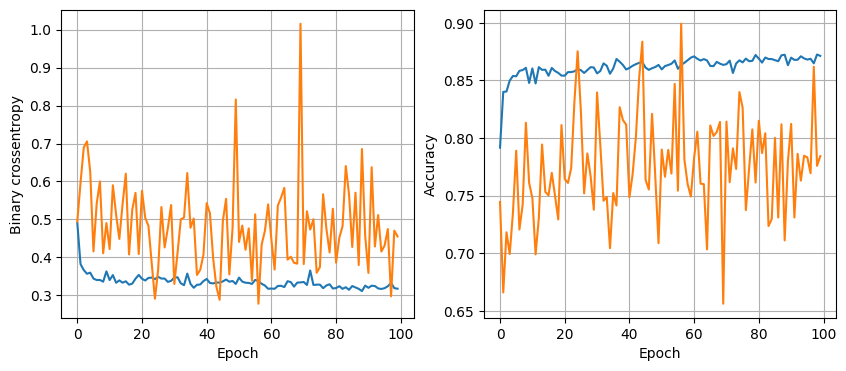

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8757
64 nodes, dropout 0, lr 0.005, batch size 32


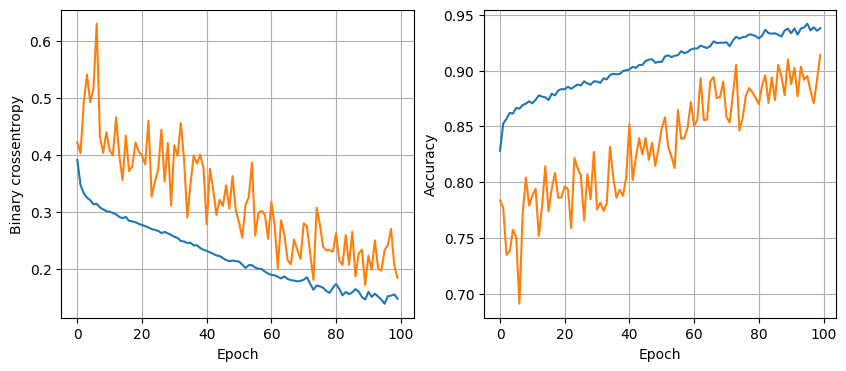

119/119 [==============================] - 0s 2ms/step - loss: 0.6059 - accuracy: 0.8491
64 nodes, dropout 0, lr 0.005, batch size 64


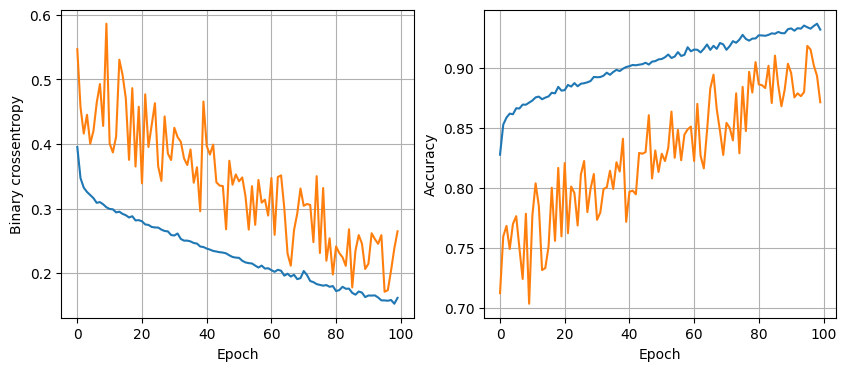

119/119 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.005, batch size 128


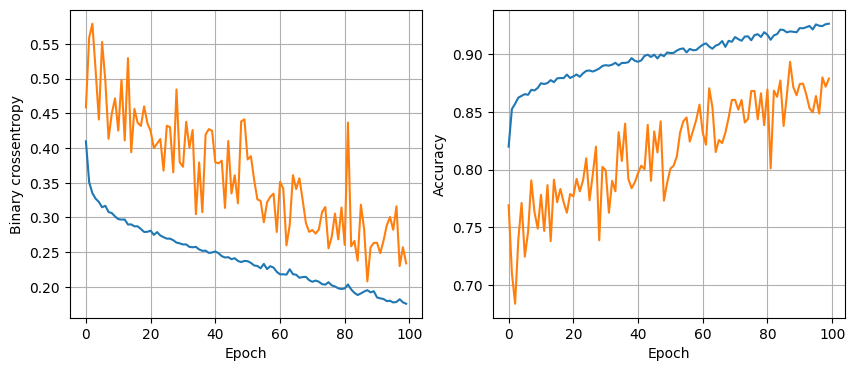

119/119 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.001, batch size 32


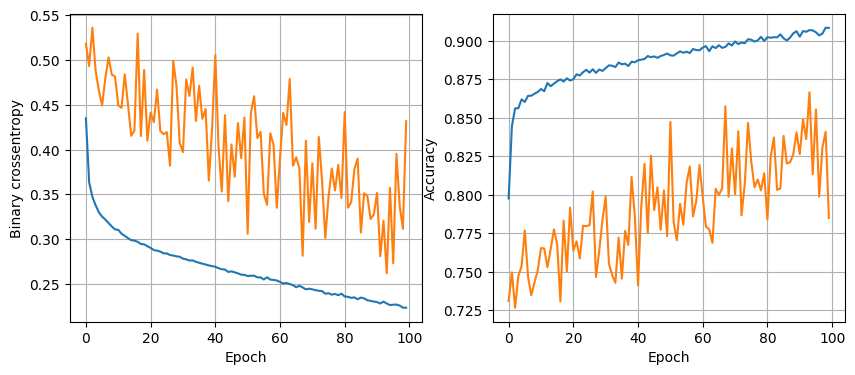

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8757
64 nodes, dropout 0, lr 0.001, batch size 64


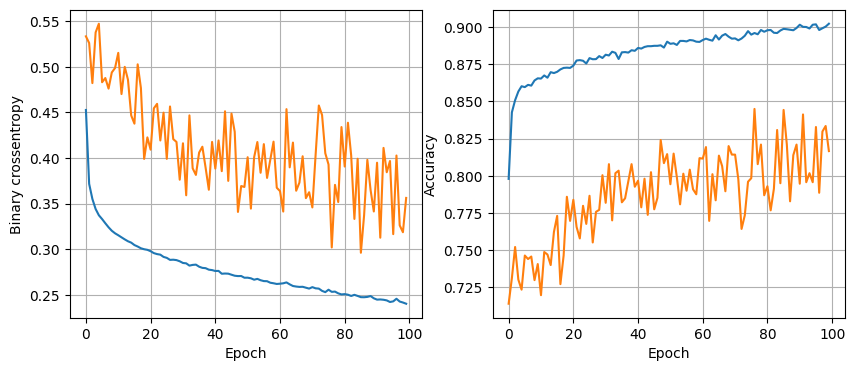

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8830
64 nodes, dropout 0, lr 0.001, batch size 128


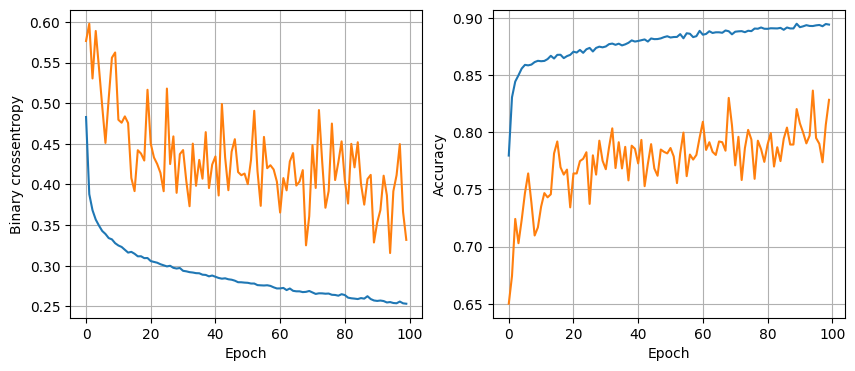

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8751
64 nodes, dropout 0.2, lr 0.1, batch size 32


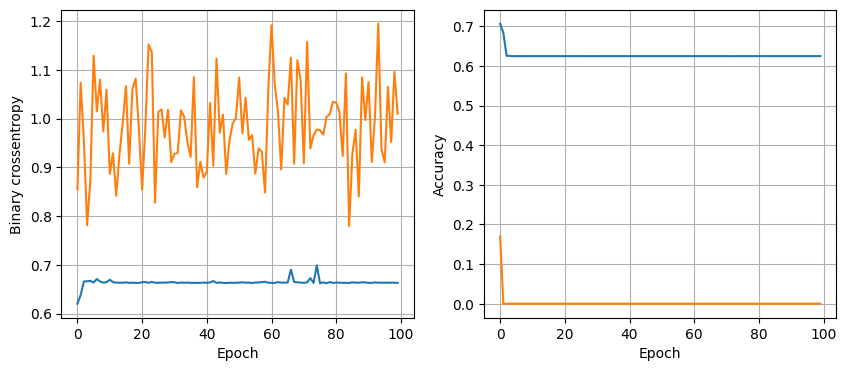

119/119 [==============================] - 0s 2ms/step - loss: 0.6521 - accuracy: 0.6425
64 nodes, dropout 0.2, lr 0.1, batch size 64


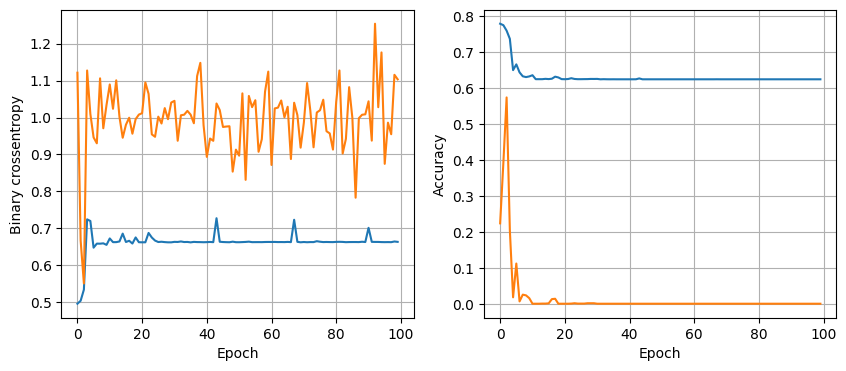

119/119 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6425
64 nodes, dropout 0.2, lr 0.1, batch size 128


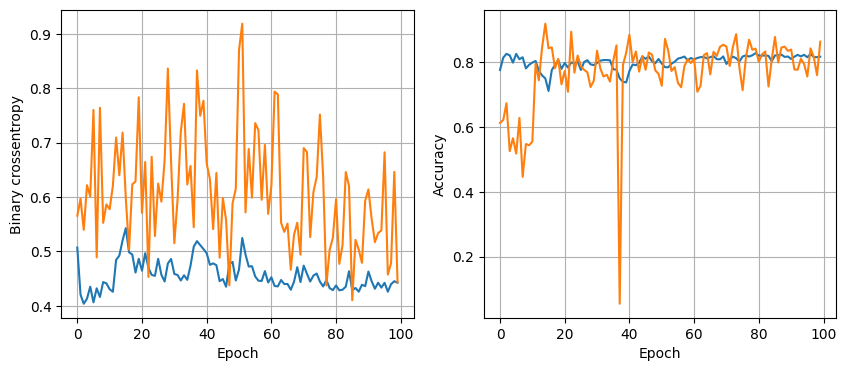

119/119 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8199
64 nodes, dropout 0.2, lr 0.005, batch size 32


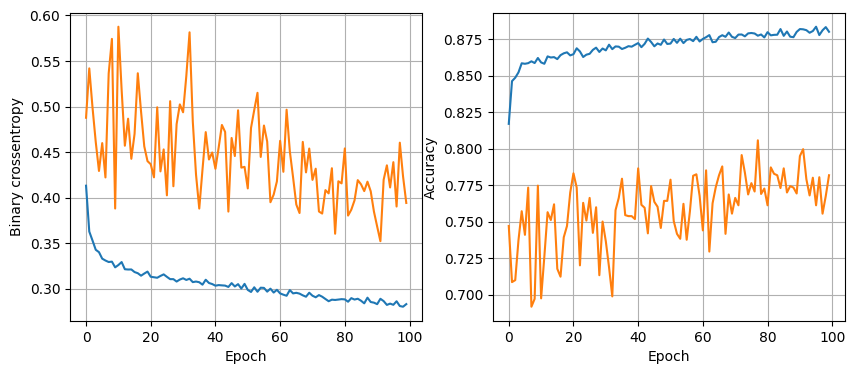

119/119 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.8830
64 nodes, dropout 0.2, lr 0.005, batch size 64


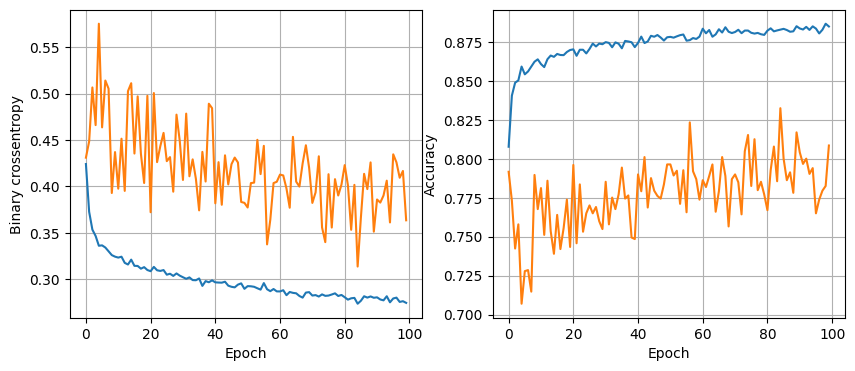

119/119 [==============================] - 0s 2ms/step - loss: 0.2951 - accuracy: 0.8846
64 nodes, dropout 0.2, lr 0.005, batch size 128


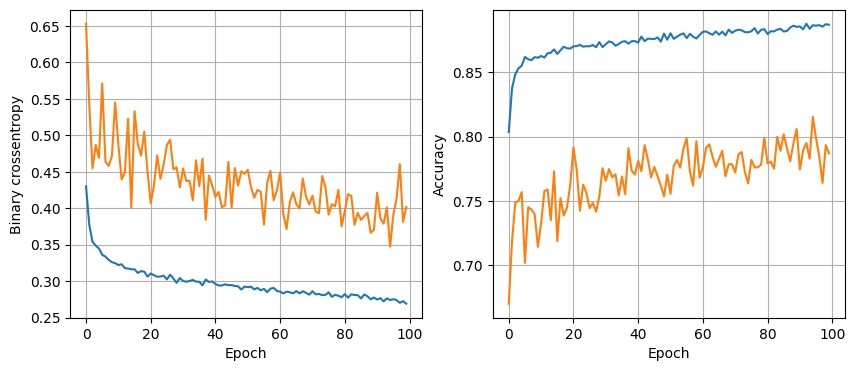

119/119 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8835
64 nodes, dropout 0.2, lr 0.001, batch size 32


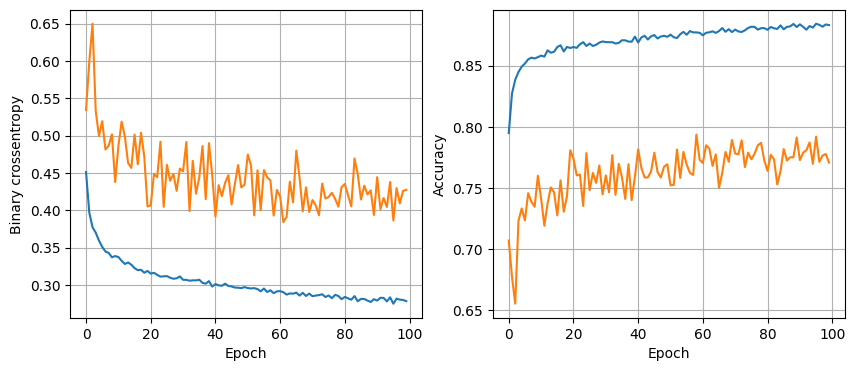

119/119 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8838
64 nodes, dropout 0.2, lr 0.001, batch size 64


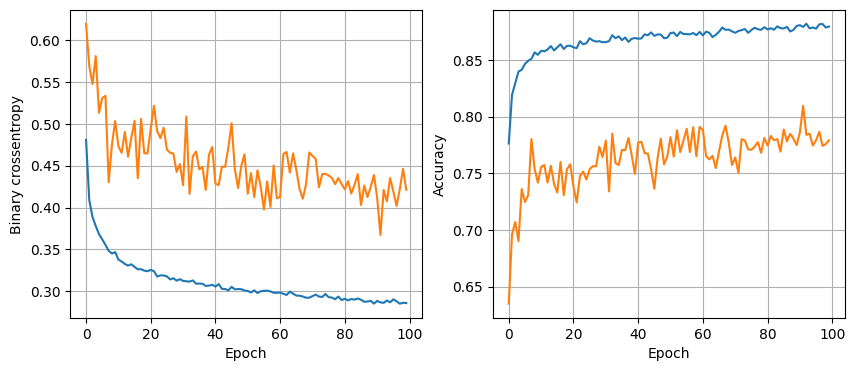

119/119 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8862
64 nodes, dropout 0.2, lr 0.001, batch size 128


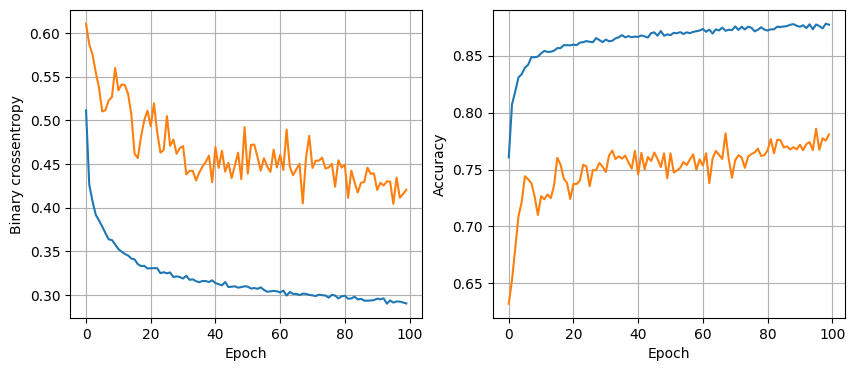

119/119 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.8825


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 4ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1330
           1       0.88      0.94      0.91      2474

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804

